In [1]:
#! /usr/bin/env python
from geopandas import GeoDataFrame
import pandas as pd
import matplotlib.pyplot as plt
from vayu import interpolPlot

In [2]:
shapeFile = "../re/tl_2017_us_state.shp"
long = "Longitude"
lat = "Latitude"
pollutant = "Arithmetic Mean"
df = pd.read_csv("../re/daily_44201_2018.csv")
shape_df = GeoDataFrame.from_file(shapeFile)
shape_df.drop(shape_df.index[[34, 35, 36, 40, 41, 49, 31]], inplace=True)

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/geopandas/base.py:38: UserWarning: GeoSeries crs mismatch: {'init': 'epsg:4269'} and {'init': 'epsg:4326'}
  warn("GeoSeries crs mismatch: {0} and {1}".format(left.crs, right.crs))


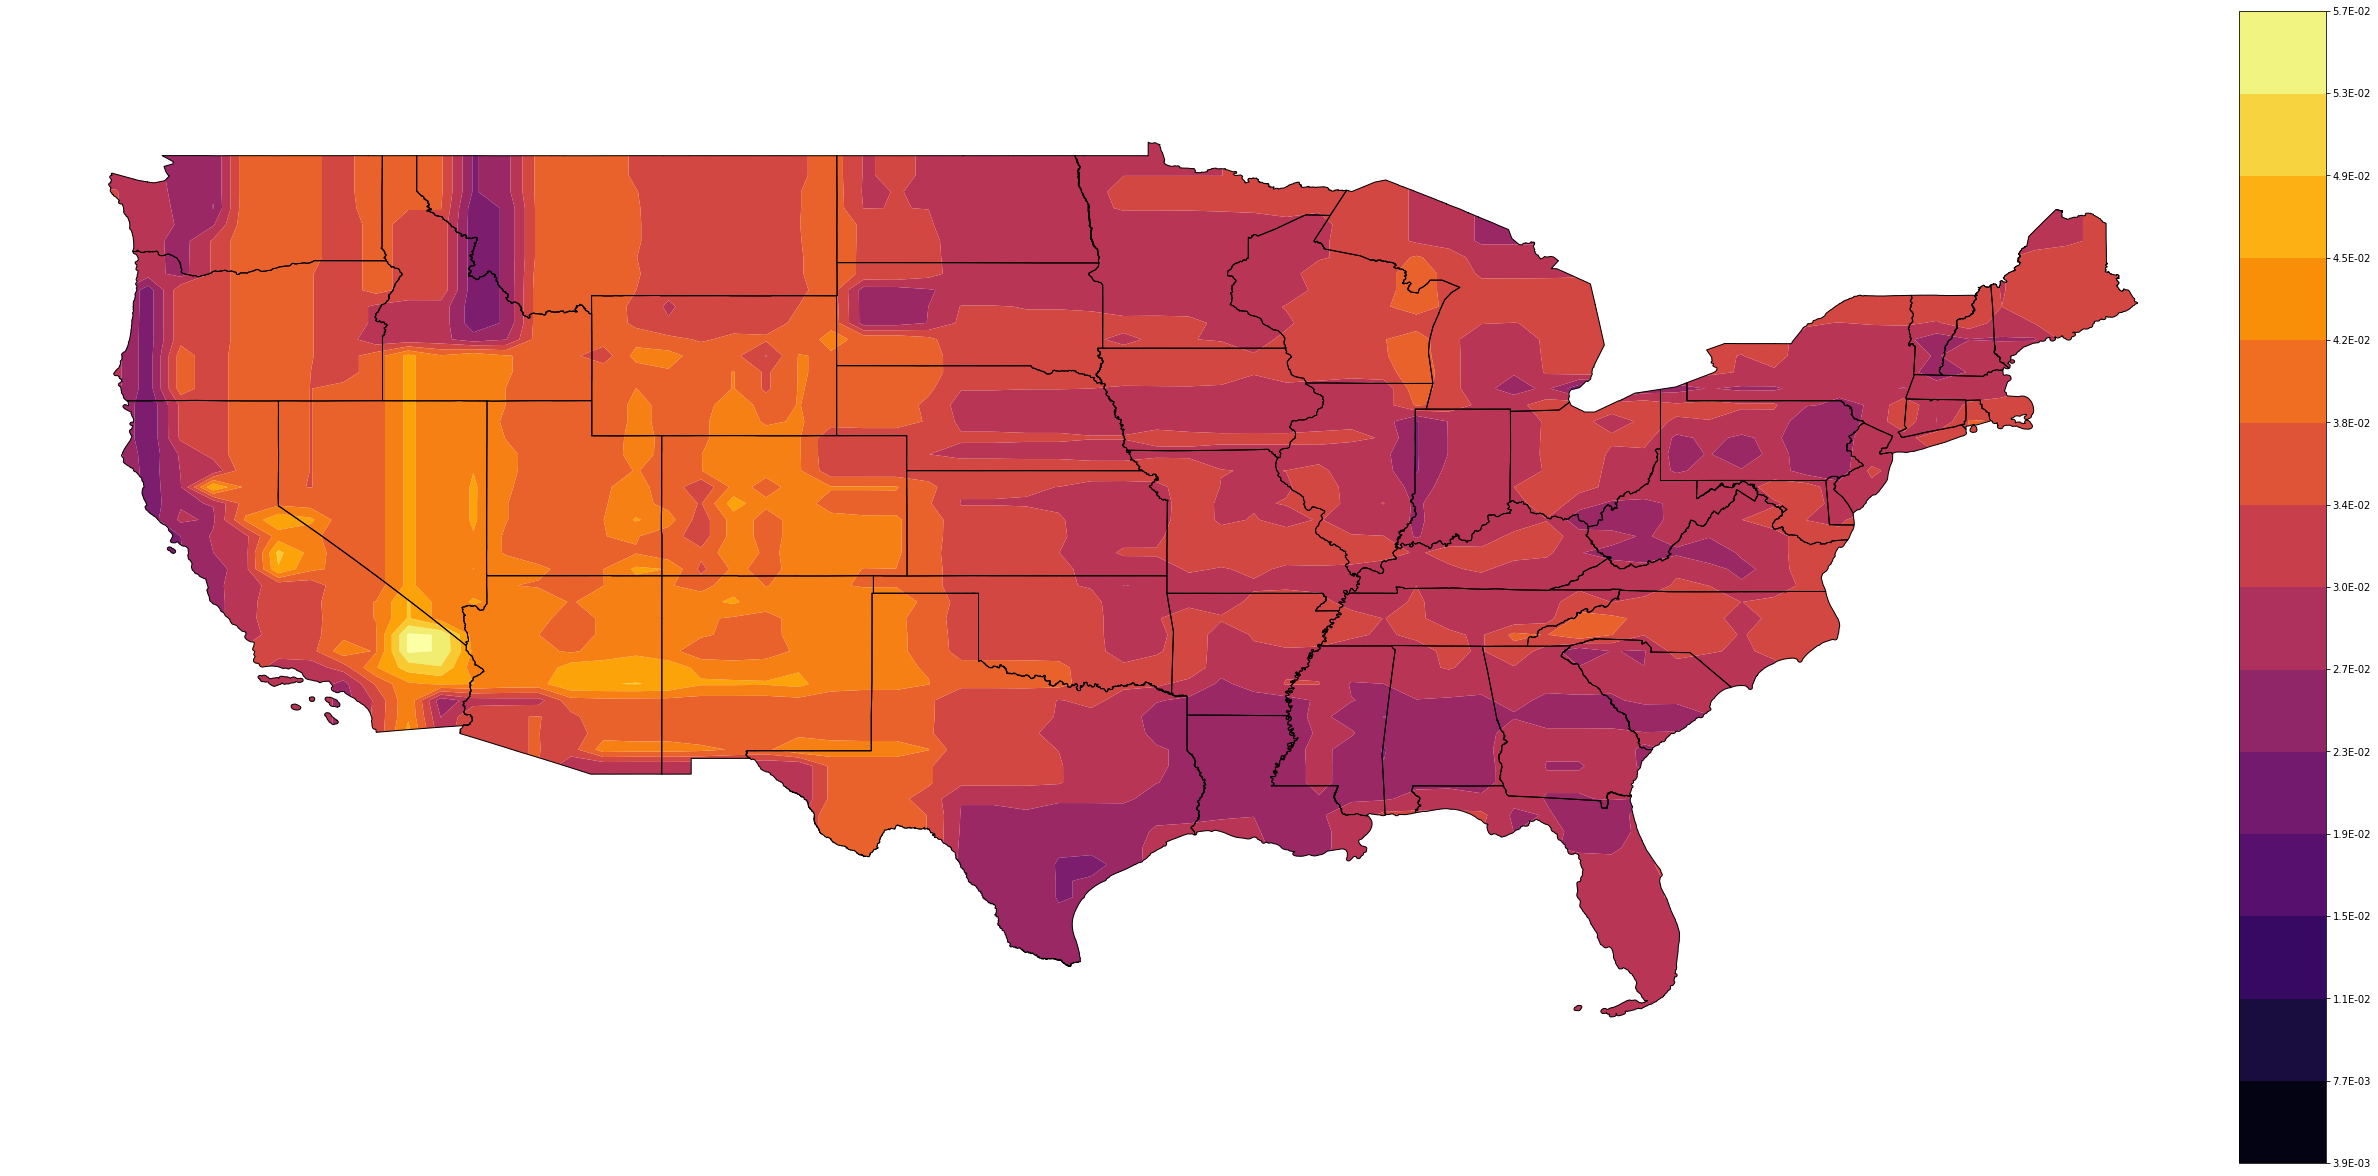

In [3]:
interpolPlot(df, shape_df, long, lat, pollutant)
plt.savefig("interpolPlot1.png")
plt.show()

Focusing on Califonria.

In [4]:
shape_df = shape_df[13:14]

We don't support `LinearSegmentedColormap` pass a `ListedColormap`. We will be demoing below how to convert from former to latter.

In [5]:
interpolPlot(df, shape_df, long, lat, pollutant, cmap='Greens')
plt.show()

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: We only support ListedColormap right now.
simply convert your cmap to ListedColormap using url here.https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py

In [6]:
# Converting to ListedColormap

import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

N = 258
cmap_colors = cm.get_cmap('Greens', N)
newcolors = (cmap_colors(np.linspace(0, 1, N))[:, :3]).tolist()
listedcmap = ListedColormap(newcolors, name='GreensListed', N=N)

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/geopandas/base.py:38: UserWarning: GeoSeries crs mismatch: {'init': 'epsg:4269'} and {'init': 'epsg:4326'}
  warn("GeoSeries crs mismatch: {0} and {1}".format(left.crs, right.crs))


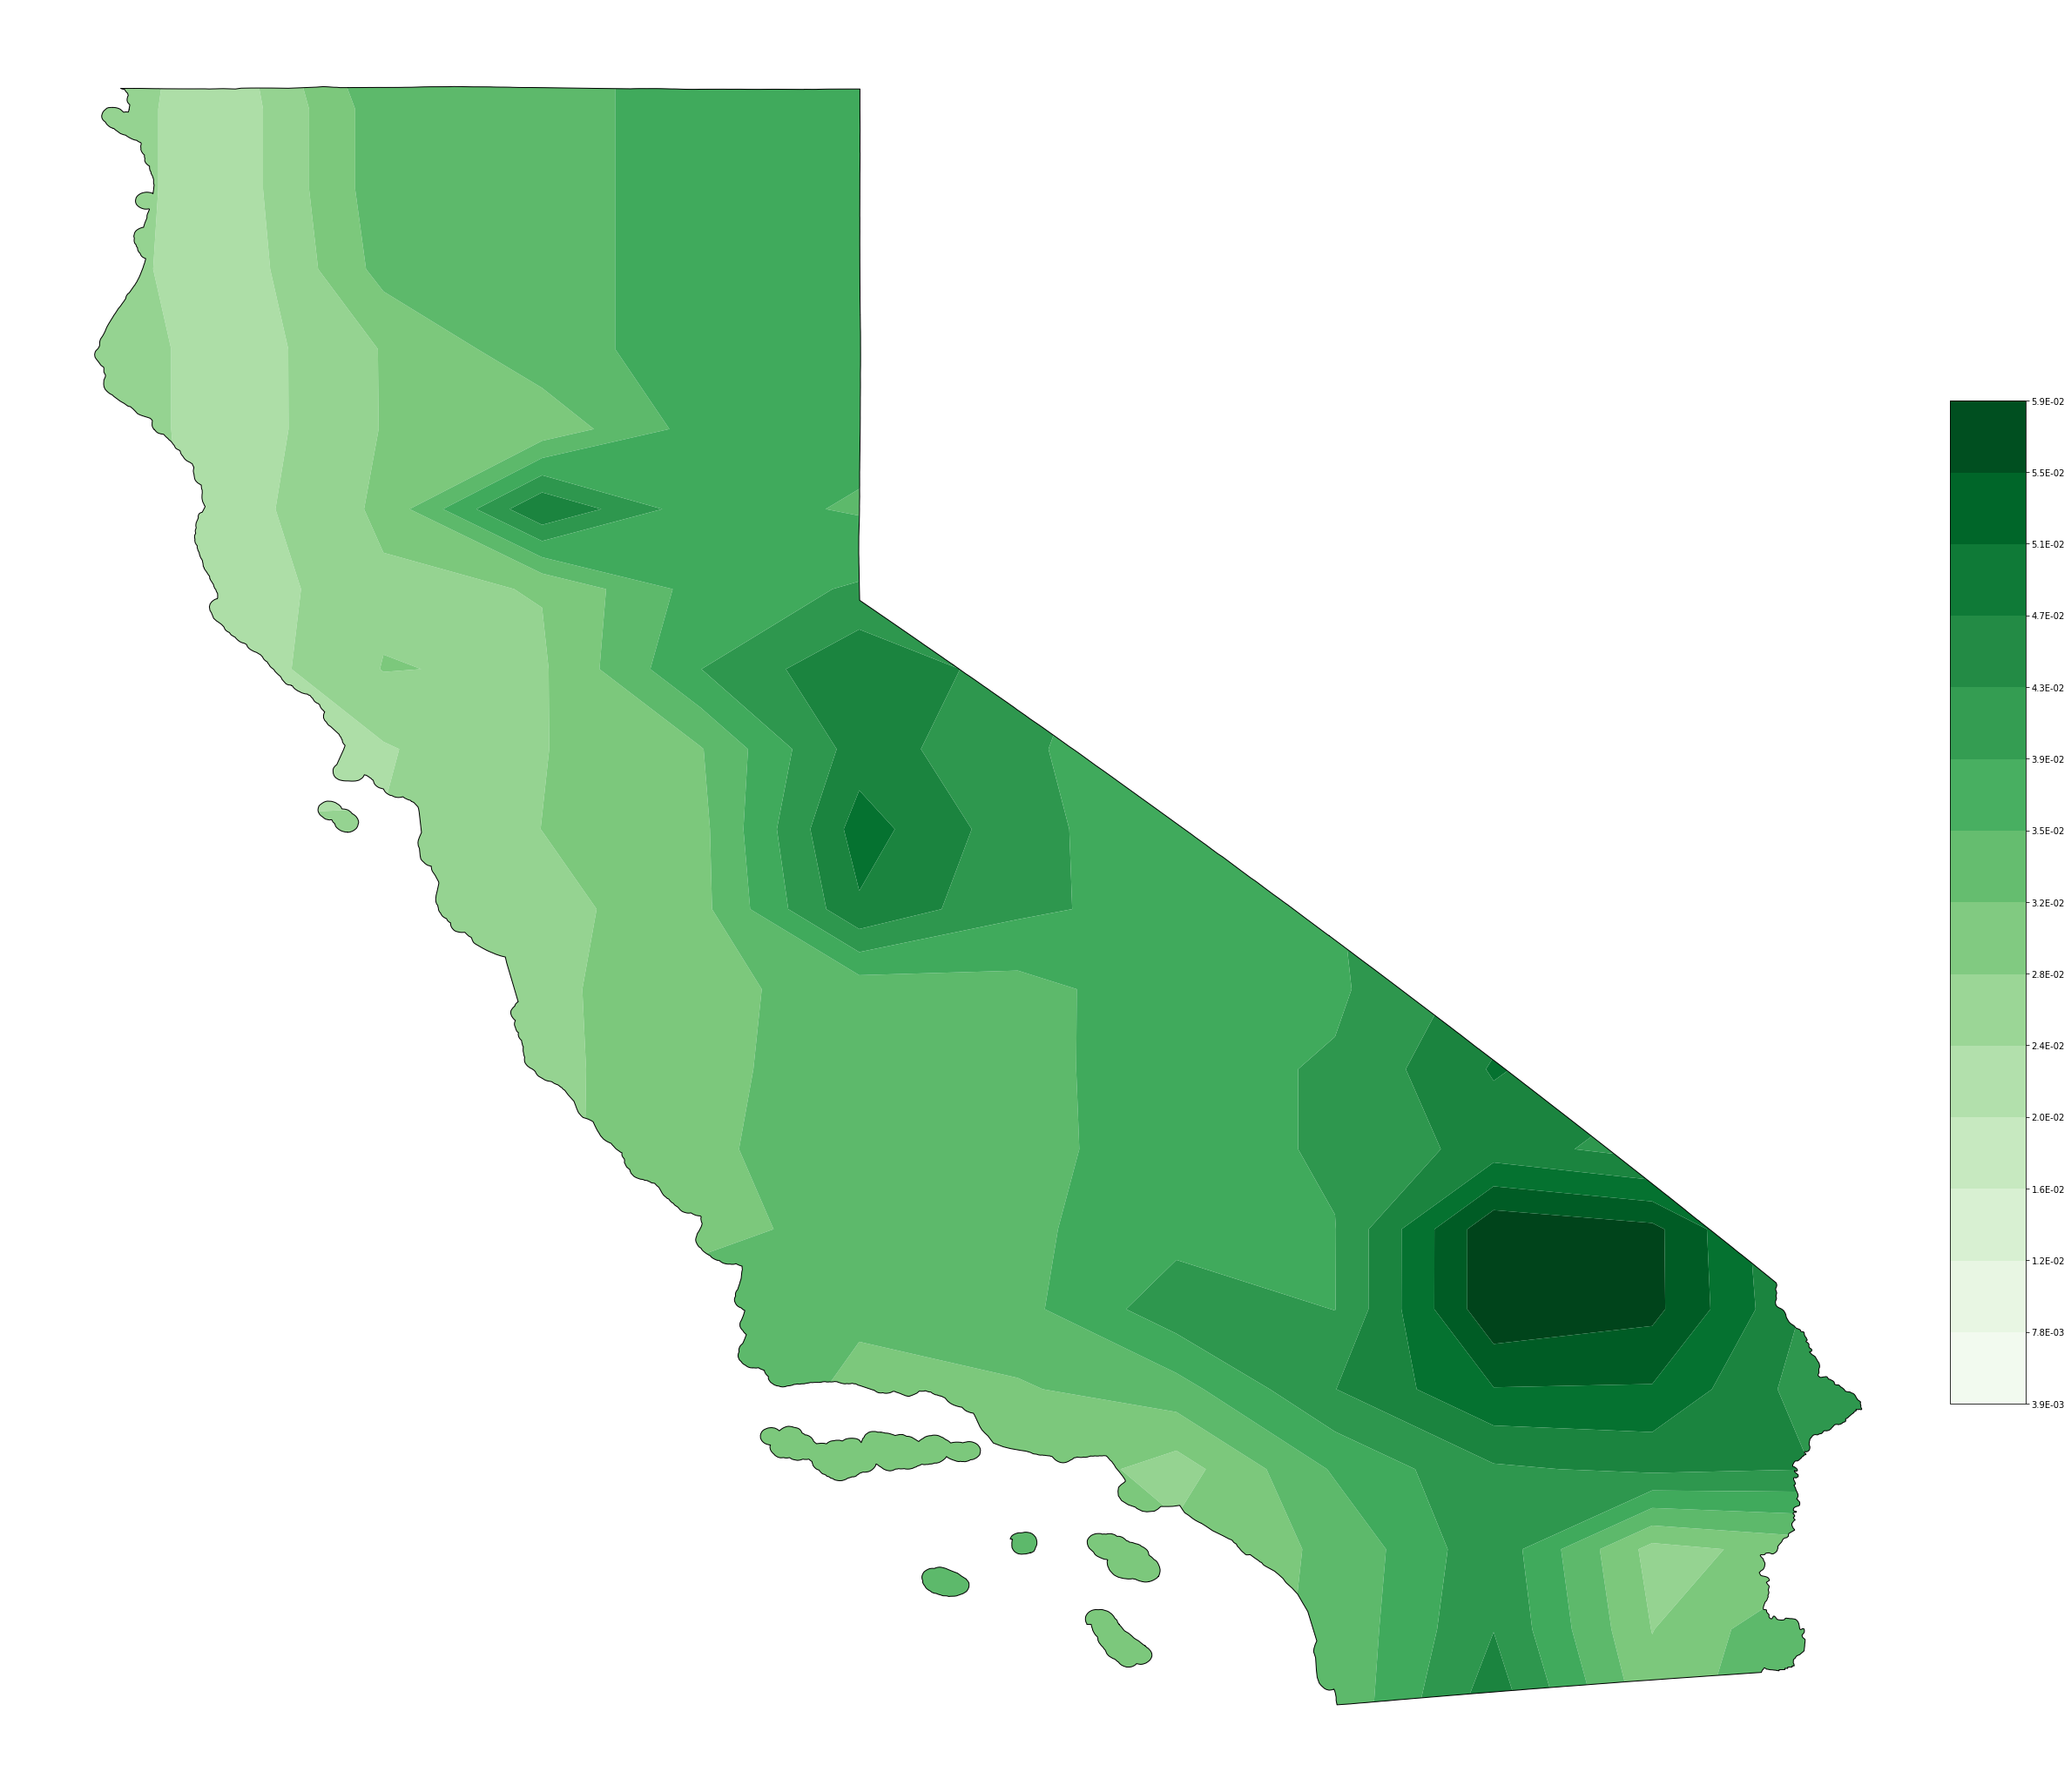

In [7]:
interpolPlot(df, shape_df, long, lat, pollutant, cmap=listedcmap)
plt.savefig("interpolPlot2.png")
plt.show()